In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [5]:
# carga de datos
df = pd.read_csv('16_3.csv', sep=';')
df

,Ventas $ (Y),Anuncios radio (X1),Anuncios periodicos (X2)
0,973,0,40
1,1119,0,40
2,875,25,25
3,625,25,25
4,910,30,30
5,971,30,30
6,931,35,35
7,1177,35,35
8,882,40,25
9,982,40,25


In [12]:
df.columns = ['Ventas', 'Radio', 'Periodicos']
X = df[['Radio', 'Periodicos']]
X = sm.add_constant(X)
Y = df['Ventas']
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     40.16
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.50e-07
Time:                        22:55:00   Log-Likelihood:                -141.11
No. Observations:                  22   AIC:                             288.2
Df Residuals:                      19   BIC:                             291.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4304    126.758      1.234      0.232    -108.877     421.738
Radio         13.0807      1.759      7.435      0.000       9.398      16.763
Periodicos    16.7953      2.963      5.668      0.000      10.593      22.998
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.296
Skew:                          -0.118   Prob(JB):                        0.862
Kurtosis:                       2.483   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# pregnta 13.6 - d
b0 = 156.4304
b1 = 13.0807
b2 = 16.7953
x1 = 20 # en miles
x2 = 20 # en miles
y = b0 + x1*b1 + x2*b2
print(f"Las ventas son {y} por {x1}M en Radio y {x2}M en Periodicos")

Las ventas 753.9504 por 20M en Radio y 20M en Periodicos


In [27]:
# pregunta 13.6 - e
x1_ = df.loc[:, 'Radio'].mean()
x2_ = df.loc[:, "Periodicos"].mean()

print(f"Media de Radio {x1_}, media de Periodicos {x2_}")
print(f"b0 ={b0} +-{421.738-b0},(-108.877, 421.738)")
print(f"b1 ={b1} +-{b1-9.398},(9.398, 16.763)")
print(f"b2 ={b2} +-{b2-10.593},(10.593, 22.998)")

y1 = (b0-265.3076) + (b1-3.6827000000000005)*x1 + (b2-6.202300000000001)*x2
y2 = (b0+265.3076) + (b1+3.6827000000000005)*x1 + (b2+6.202300000000001)*x2
print(f"Las ventas serian ({y1}, {y2})")

Media de Radio 43.18181818181818, media de Periodicos 30.0
b0 =156.4304 +-265.3076,(-108.877, 421.738)
b1 =13.0807 +-3.6827000000000005,(9.398, 16.763)
b2 =16.7953 +-6.202300000000001,(10.593, 22.998)
Las ventas serian (290.94280000000003, 1216.958)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Radio', ylabel='Ventas'>

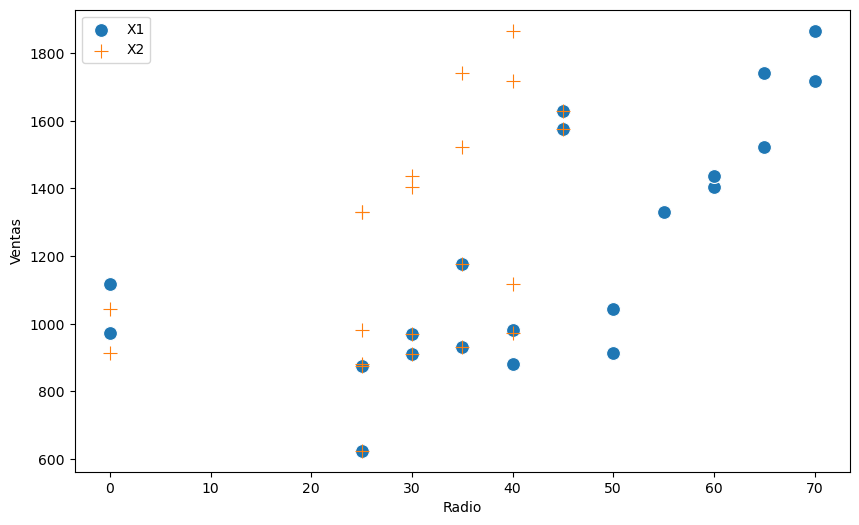

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Radio', y='Ventas', palette="Set1", s=100, marker='o', label='X1')
sns.scatterplot(data=df, x='Periodicos', y='Ventas', palette="Set2", s=100, marker='+', label='X2')